In [1]:
# Mini Project 1 - Georgia Microbiome Data Set

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from io import BytesIO
import base64

In [8]:
df = pd.read_csv("/Users/kivanc/DataMining-ML/Projects/MiniProject1/Combined_30_Comma.csv", sep=',')
print(df.head())

   Unnamed: 0      #SampleID  345dcc18d51f44572bd67c08e5e95b8b  \
0           0  GA188repBS600                                 0   
1           1    GA1811S1400                                 5   
2           2    GA1824S1400                                 5   
3           3  GA1829SLM1400                                 0   
4           4    GA1813I1400                                68   

   074e66f75650948b8df12cfe2ffb5f37  060fdbbfa61cbfb4d47350dc2a2019cd  \
0                                 0                               161   
1                                 0                               323   
2                                 0                               196   
3                                 0                               205   
4                                 0                              2678   

   d2208d27b5df4c53eb547f7ac45f4d6b  574d164310944193d8fc13dc10346e58  \
0                                 0                                 0   
1                 

In [9]:
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)
df = df.drop(['PlantA_Or_B','Notes','Location','Date_Taken','GA_Microbiome','Living_Mulch','Endophyte','R1_Fastq_Name','R2_Fastq_Name','Sample_or_Control','Sampling_Number','Plate','Row','Column','Well','Soil_Test_Number','Living_Mulch_Treatment','reads','quant_reading','Concentration'], axis =1)
print(df.head())

   345dcc18d51f44572bd67c08e5e95b8b  074e66f75650948b8df12cfe2ffb5f37  \
0                                 0                                 0   
1                                 5                                 0   
2                                 5                                 0   
3                                 0                                 0   
4                                68                                 0   

   060fdbbfa61cbfb4d47350dc2a2019cd  d2208d27b5df4c53eb547f7ac45f4d6b  \
0                               161                                 0   
1                               323                                 0   
2                               196                                 0   
3                               205                                 0   
4                              2678                                 0   

   574d164310944193d8fc13dc10346e58  8cb92babedb9f4ff7bedee4ac4f47370  \
0                                 0              

In [42]:
# drop rows with NA's
print("Rows Before Dropping NAs: " + str(len(df.index)))
df = df.dropna(axis=0, how='any')
print("Rows After Dropping NAs: " + str(len(df.index)))

a = df.columns[np.arange(0,30)]
b = ['Endo' + str(i) for i in np.arange(1,len(a)+1)]
d = dict(zip(a, b))
df = df.rename(columns=d)
print(df.head())

Rows Before Dropping NAs: 409
Rows After Dropping NAs: 409
   Endo1  Endo2  Endo3  Endo4  Endo5  Endo6  Endo7  Endo8  Endo9  Endo10  ...  \
0      0      0    161      0      0      0      0     99      0       5  ...   
1      5      0    323      0      0      0      0     54      0      22  ...   
2      5      0    196      0      0      0      0    676      0      16  ...   
3      0      0    205      0      0      0     12    194      0       7  ...   
4     68      0   2678      0      0     16      0    677      0      23  ...   

   Mn_ppm  Mo_ppm  Na_ppm  Ni_ppm  P_ppm  Pb_ppm  Zn_ppm  Organic_Matter_perc  \
0    5.30   0.020    6.93    2.28  40.37    0.66    4.27                 3.29   
1   31.63   0.020    5.24    0.91  75.20    0.26    6.98                 2.28   
2   29.02   0.025    8.92    0.41  35.41    0.06   10.39                 3.32   
3   31.68   0.025   10.73    2.24  23.77    0.35    3.90                 3.03   
4    9.10   0.020   12.64    1.74  35.20    1.17 

In [43]:
# Parse Data Set - Sample Type is Label of interest

y = np.array(df['Sample_Type'])
X = df.drop(columns=['Sample_Type'])

a = df.columns[np.arange(1,30)]
b = ['Endo' + str(i) for i in np.arange(1,len(a)+1)]
d = dict(zip(a, b))
df = df.rename(columns=d)

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.25, random_state = 18)
print(test_labels)
print(test_features)

['Rhizosphere' 'Stalk' 'Inrow_Soil' 'Root' 'Root' 'Root' 'Inrow_Soil'
 'Stalk' 'Root' 'Root' 'Stalk' 'Soil' 'Soil' 'Rhizosphere' 'Inrow_Soil'
 'Rhizosphere' 'Rhizosphere' 'Rhizosphere' 'Stalk' 'Rhizosphere' 'Stalk'
 'Root' 'Rhizosphere' 'Stalk' 'Stalk' 'Soil' 'Stalk' 'Inrow_Soil' 'Soil'
 'Rhizosphere' 'Inrow_Soil' 'Rhizosphere' 'Stalk' 'Stalk' 'Rhizosphere'
 'Root' 'Rhizosphere' 'Root' 'Rhizosphere' 'Root' 'Inrow_Soil' 'Root'
 'Root' 'Root' 'Root' 'Soil' 'Stalk' 'Stalk' 'Soil' 'Rhizosphere' 'Stalk'
 'Rhizosphere' 'Soil' 'Stalk' 'Rhizosphere' 'Root' 'Inrow_Soil' 'Soil'
 'Rhizosphere' 'Stalk' 'Stalk' 'Root' 'Root' 'Root' 'Root' 'Root'
 'Inrow_Soil' 'Rhizosphere' 'Rhizosphere' 'Rhizosphere' 'Rhizosphere'
 'Root' 'Soil' 'Rhizosphere' 'Soil' 'Soil' 'Rhizosphere' 'Stalk' 'Stalk'
 'Root' 'Rhizosphere' 'Rhizosphere' 'Root' 'Root' 'Root' 'Stalk'
 'Inrow_Soil' 'Root' 'Stalk' 'Root' 'Root' 'Rhizosphere' 'Root'
 'Rhizosphere' 'Rhizosphere' 'Rhizosphere' 'Stalk' 'Stalk' 'Soil'
 'Inrow_Soil' 'Soil' 

## Model Evaluation

In [88]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'):
    """
    This function prints and plots the confusion matrix.
    source: http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/
    """
    import itertools

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Decision Tree Accuracy: 0.7475728155339806
[[18 10  0  0  0]
 [ 4 16  0  2  0]
 [ 0  1  6  0  3]
 [ 1  2  0 25  0]
 [ 1  0  2  0 12]]
Confusion matrix, without normalization

Random Forest Accuracy: 0.7475728155339806

[[17 11  0  0  0]
 [ 6 16  0  0  0]
 [ 0  0  4  1  5]
 [ 1  0  0 27  0]
 [ 2  0  0  0 13]]
Confusion matrix, without normalization

Gaussian NB Accuracy: 0.8058252427184466

[[28  0  0  0  0]
 [ 8 14  0  0  0]
 [ 0  0  6  1  3]
 [ 1  0  0 27  0]
 [ 1  0  6  0  8]]
Confusion matrix, without normalization



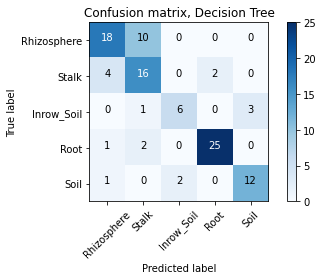

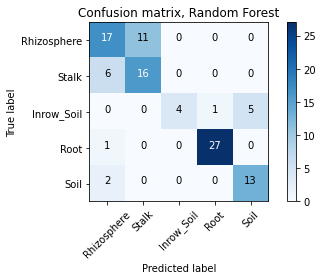

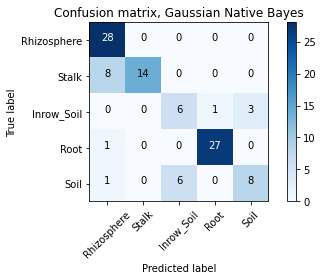

In [87]:
# Classifiers:

# Decision Tree
clf_dt = DecisionTreeClassifier()
clf_dt.fit(train_features, train_labels)
y_pred_dt = clf_dt.predict(test_features)
print('Decision Tree Accuracy: ' + str(metrics.accuracy_score(test_labels,y_pred_dt)))


cm_dt = confusion_matrix(test_labels, y_pred_dt, labels=['Rhizosphere', 'Stalk', 'Inrow_Soil', 'Root', 'Soil'])
print(cm_dt)
plt.figure(figsize=(6,4))
plot_confusion_matrix(cm_dt, classes=['Rhizosphere', 'Stalk', 'Inrow_Soil', 'Root', 'Soil'],
                      title='Confusion matrix, Decision Tree')
plt.savefig('fig1.png')

report_dt = classification_report(test_labels, y_pred_dt, output_dict=True)
report_dt = pd.DataFrame(report_dt).transpose()
report_dt.to_csv ("/Users/kivanc/DataMining-ML/Projects/report_dt.csv", index = True, header=True)

print("")

# Random Forest
clf_rf = RandomForestClassifier(n_estimators=10000, random_state=18, max_features = 'sqrt',n_jobs=-1, verbose = 0)
clf_rf.fit(train_features, train_labels)
y_pred_rf = clf_rf.predict(test_features)
print('Random Forest Accuracy: ' + str(metrics.accuracy_score(test_labels,y_pred_rf)))

print("")
cm_rf = confusion_matrix(test_labels, y_pred_rf, labels=['Rhizosphere', 'Stalk', 'Inrow_Soil', 'Root', 'Soil'])
print(cm_rf)
plt.figure(figsize=(6,4))
plot_confusion_matrix(cm_rf, classes=['Rhizosphere', 'Stalk', 'Inrow_Soil', 'Root', 'Soil'],
                      title='Confusion matrix, Random Forest')
plt.savefig('fig2.png')

report_rf = classification_report(test_labels, y_pred_rf, output_dict=True)
report_rf = pd.DataFrame(report_rf).transpose()
report_rf.to_csv ("/Users/kivanc/DataMining-ML/Projects/report_rf.csv", index = True, header=True)

print("")

## Ada Boost Classifier
#clf_abc = AdaBoostClassifier(n_estimators=1000, learning_rate=1)
#clf_abc.fit(train_features, train_labels)
#y_pred_abc = clf_abc.predict(test_features)
#print('Ada Boost Classifier Accuracy: ' + str(metrics.accuracy_score(test_labels,y_pred_abc)))
#
#print("")
#cm_abc = confusion_matrix(test_labels, y_pred_abc, labels=['Rhizosphere', 'Stalk', 'Inrow_Soil', 'Root', 'Soil'])
#print(cm_abc)
#plt.figure()
#plot_confusion_matrix(cm_abc, classes=['Rhizosphere', 'Stalk', 'Inrow_Soil', 'Root', 'Soil'],
#                      title='Confusion matrix, Ada Boost Classifier')
#print('Ada Boost Classification Metrics')
#print(60*'_')
#print(classification_report(test_labels, y_pred_abc))
#print(60*'_')
#print("")

# SVM
#clf_svm = svm.SVC(kernel='rbf',C=1.91,gamma='scale') # Linear Kernel
#clf_svm.fit(train_features, train_labels)
#y_pred_svm = clf_svm.predict(test_features)
#print('SVM  Classifier Accuracy: ' + str(metrics.accuracy_score(test_labels,y_pred_svm)))
#
#print("")
#cm_svm = confusion_matrix(test_labels, y_pred_svm, labels=['Rhizosphere', 'Stalk', 'Inrow_Soil', 'Root', 'Soil'])
#print(cm_svm)
#plt.figure()
#plot_confusion_matrix(cm_svm, classes=['Rhizosphere', 'Stalk', 'Inrow_Soil', 'Root', 'Soil'],
#                      title='Confusion matrix, SVM')
#print('SVM Classification Metrics')
#print(60*'_')
#print(classification_report(test_labels, y_pred_svm))
#print(60*'_')
#print("")

#Gaussian Native Bayes
clf_nb = GaussianNB()
clf_nb.fit(train_features, train_labels)
y_pred_nb = clf_nb.predict(test_features)
print('Gaussian NB Accuracy: ' + str(metrics.accuracy_score(test_labels,y_pred_nb)))

print("")
cm_nb = confusion_matrix(test_labels, y_pred_nb, labels=['Rhizosphere', 'Stalk', 'Inrow_Soil', 'Root', 'Soil'])
print(cm_nb)
plt.figure(figsize=(6,4))
plot_confusion_matrix(cm_nb, classes=['Rhizosphere', 'Stalk', 'Inrow_Soil', 'Root', 'Soil'],
                      title='Confusion matrix, Gaussian Native Bayes')
plt.savefig('fig3.png')

report_nb = classification_report(test_labels, y_pred_nb, output_dict=True)
report_nb = pd.DataFrame(report_nb).transpose()
report_nb.to_csv ("/Users/kivanc/DataMining-ML/Projects/report_nb.csv", index = True, header=True)

print("")

## MLP Classifier
#clf_nn = MLPClassifier(hidden_layer_sizes=(79,79,79), activation='relu', solver='adam', max_iter=100000)
#clf_nn.fit(train_features, train_labels)
#y_pred_nn = clf_nn.predict(test_features)
#print('MLP Classifier Accuracy: ' + str(metrics.accuracy_score(test_labels,y_pred_nn)))
#
#print("")
#cm_nn = confusion_matrix(test_labels, y_pred_nn, labels=['Rhizosphere', 'Stalk', 'Inrow_Soil', 'Root', 'Soil'])
#print(cm_nn)
#plt.figure()
#plot_confusion_matrix(cm_nn, classes=['Rhizosphere', 'Stalk', 'Inrow_Soil', 'Root', 'Soil'],
#                      title='Confusion matrix, MLP Classifier')
#print('MLP Classification Metrics')
#print(60*'_')
#print(classification_report(test_labels, y_pred_nn))
#print(60*'_')
#print("")

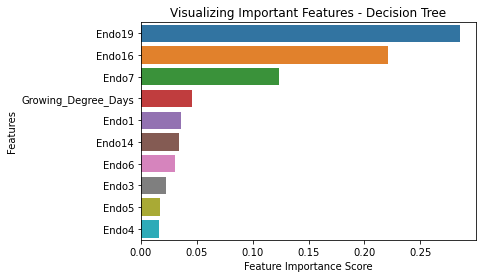

This data set doesn't contain taxonomy of OTUs which would give us the biological relevance
Endo15  0.076 +/- 0.012
Endo2   0.070 +/- 0.018
Endo18  0.063 +/- 0.016
Endo25  0.059 +/- 0.013
Endo23  0.057 +/- 0.013
Endo11  0.054 +/- 0.012
Endo28  0.054 +/- 0.016
Endo26  0.052 +/- 0.014
Endo9   0.049 +/- 0.009
Endo7   0.044 +/- 0.012
Endo16  0.041 +/- 0.012
Endo13  0.041 +/- 0.012
Endo1   0.041 +/- 0.010
Endo27  0.039 +/- 0.008
Endo17  0.037 +/- 0.008
Endo24  0.033 +/- 0.007
Endo6   0.029 +/- 0.013
Endo4   0.027 +/- 0.011
Endo14  0.024 +/- 0.006
Endo1   0.022 +/- 0.009
Endo29  0.022 +/- 0.005
Endo20  0.018 +/- 0.006
Endo21  0.018 +/- 0.006
Endo19  0.016 +/- 0.006
Endo5   0.014 +/- 0.006


In [70]:
# make figure of top 10 features, importances - Decision Tree had best accuracy

feature_list = list(X.columns)
feature_imp = pd.Series(clf_dt.feature_importances_,index=feature_list).sort_values(ascending=False)
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features - Decision Tree")
plt.show()
print("This data set doesn't contain taxonomy of OTUs which would give us the biological relevance")


r = permutation_importance(clf_nb, train_features, train_labels,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df.columns[i]:<8}"
            f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")


In [ ]:
# Model Evaluation - Kivanc
# Compare dt to random forest? - Corey
# Cross Validation? - Kun-Lin


In [69]:
print(df.columns[1])

Endo1
